## MOVING ON WITH THE DATA TRANSFORMATION AND BASIC INFERENTIAL STATISTICS STEP:

1) LEARNT HOW TO IMPORT DATA FROM VARIOUS SOURCES

2) DATA EXPLORING & CLEANING 

3) DATA QUERYING,SORTING AND FILTERING 

4) INFERENTIAL STATS



Step 1
Here we can import the data in two forms:
 1)Downloading data to the local machine
 2)Importing data from the web directly and saving it to your local machine
 3)Importing data from the web directly and  not saving it to your local machine

In [191]:
#Libraries

import pandas as pd
import numpy as np


#import openpyxl OPTIONAL

#data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly as pl



### Reading your parquet file

In [192]:

data2 = pd.read_parquet('clean_file1.parquet')

#### Quick basic data check

In [193]:
def quick_eda(df):
    """
    Perform quick Exploratory Data Analysis (EDA) on a DataFrame.

    Parameters:
    data2 (pd.DataFrame): The DataFrame to analyze.

    Returns:
    None
    """
    try:
        # Step 1: Basic Information
        print("Basic Information:")
        print(df.head())
        print(df.shape)
        print(df.info())

        # Step 2: Summary Statistics
        print("\nSummary Statistics:")
        print(df.describe(include='all'))

        # Step 3: Missing Values
        print("\nMissing Values:")
        print(df.isnull().sum())

        # Step 4: Data Types
        print("\nData Types:")
        print(df.dtypes)

    
    except KeyError as e:
        print(f"KeyError: {e}. Please check the column names in the DataFrame.")
    except ValueError as e:
        print(f"ValueError: {e}. Please check the values in the DataFrame.")
    except Exception as e:
        print(f"An error occurred: {e}")



In [194]:
#QUICK BASIC CHECKS

quick_eda(data2)


Basic Information:
     id                                               name  host_id  \
0  2265   Zen-East in the Heart of Austin (monthly rental)     2466   
1  5245  Eco friendly, Colorful, Clean, Cozy monthly share     2466   
2  5456          Walk to 6th, Rainey St and Convention Ctr     8028   
3  5769                                     NW Austin Room     8186   
4  6413                      Gem of a Studio near Downtown    13879   

   host_name  neighbourhood  latitude  longitude        room_type  price  \
0      Paddy          78702  30.27752  -97.71377  Entire home/apt    200   
1      Paddy          78702  30.27614  -97.71320     Private room    114   
2     Sylvia          78702  30.26057  -97.73441  Entire home/apt    126   
3  Elizabeth          78729  30.45697  -97.78422     Private room     39   
4       Todd          78704  30.24885  -97.73587  Entire home/apt    104   

   minimum_nights  number_of_reviews last_review  reviews_per_month  \
0               7         

#### **Columns with mixed types are stored with the object dtype

Did you see the room_type column above?
Lets further investigate the column using pandas.unique()


In [195]:
data2['room_type'].unique()




['Entire home/apt', 'Private room', 'Hotel room', 'Shared room']
Categories (4, object): ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']

Convert the room_type feature to **category(not categorical) data type**
We can use **.astype()** for data type conversion and we will store it another column in our DataFrame.

In [196]:
#data2['room_type_cate']= data2['room_type'].astype('category') 
data2['room_type'] = data2['room_type'].astype('category') 

# Two ways to check if the conversion is done 
#To make sure that the data type is converted(optional)

#data2.dtypes
assert data2['room_type'].dtype == 'category'

In [197]:
print(data2['room_type'].describe())

count               10052
unique                  4
top       Entire home/apt
freq                 7907
Name: room_type, dtype: object


###### Another data type I would like to highlight is the **date

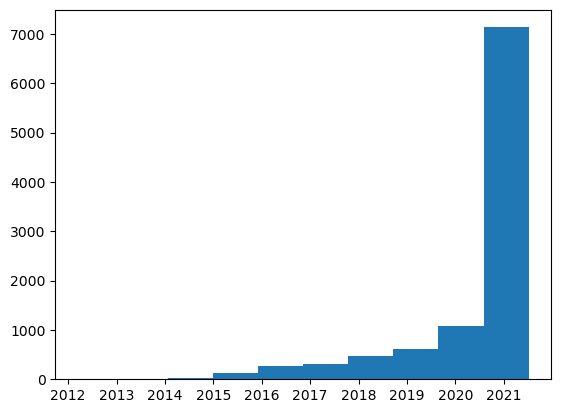

In [198]:
import matplotlib.pyplot as plt
plt.hist(data2['last_review'])
plt.show()




##### Error for the above will as follows:
TypeError: 'value' must be an instance of str or bytes, not a float











































###### Problem: last_review:object 

data2['last_review'] = data2[last_review].astype('????')

We convert it to **datetime** object in pandas

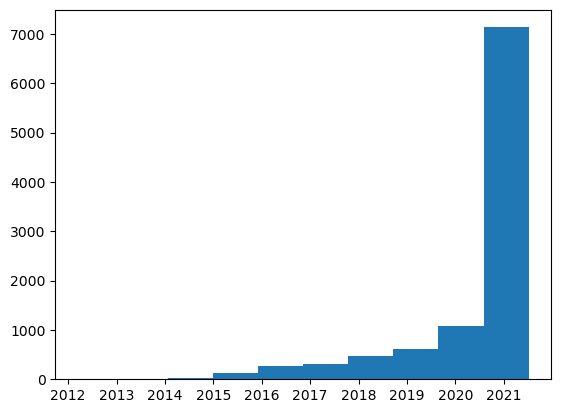

In [199]:
import matplotlib.pyplot as plt
plt.hist(data2['last_review'])
plt.show()


 
 ###### Incase if you want to ignore warnings:

import warnings
warnings.filterwarnings('ignore')

## Disclaimer: Be careful! Do not **MANIPULATE** data for your result gains

##### PLEASE ALWAYS KEEP DATA INTEGRITY!

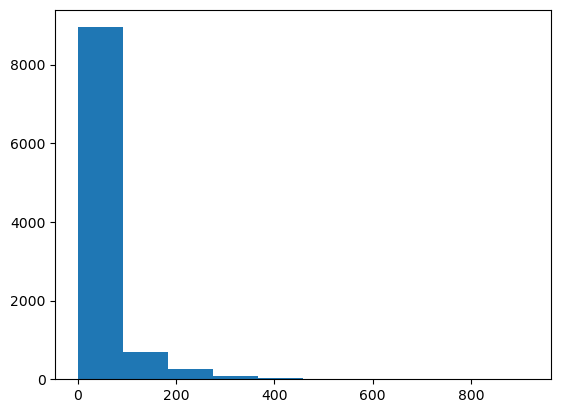

In [200]:
import matplotlib.pyplot as plt
plt.hist(data2['number_of_reviews'])
plt.show()


###### This is one technique to confirm that which rows and columns might contain irrelevant information

If the feature/column/attribute is above 95%----> :( ----> Column/Row not required

In [201]:
# create list to store the "uniformative" data
un_info = []

#check the length of the rows
rows = len(data2.index)
print(rows)

#Now is the turn of the columns

for col in data2.columns:
    col_count = data2[col].value_counts(dropna=False)
    top_pick = (col_count /rows).iloc[0]
    print(top_pick)
    
    if top_pick > 0.95:
        un_info.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pick*100))
    
    

10052
9.948269001193792e-05
0.0003979307600477517
0.014126541981695185
0.014126541981695185
0.17857142857142858
0.0033824114604058893
0.003481894150417827
0.7866096299243932
0.027656187823318742
0.3576402705929168
0.21766812574612018
0.2184639872662157
0.21766812574612018
0.5632709908475925
0.3656983684838838


In [202]:
#print("FORMAT".format(NUMBER))


In [203]:
#Iterations:
    
#for loop:
#Example:
    
#for i in range(10):
    #print(i,end = " ")

In [204]:
#value_counts: 

data2['neighbourhood'].value_counts(dropna = True)

78704    1795
78702    1292
78701     676
78741     673
78703     508
78745     485
78705     469
78751     417
78723     323
78746     245
78758     232
78734     223
78721     213
78757     203
78744     181
78722     177
78752     146
78748     143
78756     134
78731     122
78753     112
78737     107
78759     102
78749      99
78754      94
78729      94
78727      84
78724      78
78733      67
78732      63
78728      62
78717      58
78747      54
78736      52
78738      51
78725      44
78735      40
78750      39
78730      38
78739      29
78726      12
78742       8
78719       7
78712       1
Name: neighbourhood, dtype: int64

##### Now we have atleast one culprit. 
Lets check others by next techniques.

## MOVING FORWARD:

1) LEARNT HOW TO IMPORT DATA FROM VARIOUS SOURCES

2) DATA CLEANING

3) DATA EXPLORING 
   
        3.1) DATA SORTING AND SUBSETTING
   
        3.2) DATA FILTERING
   
        3.4) DATA AGGREGRATING AND GROUPING
   
        3.5) DATA SLICING AND MERGING


###### CREATING NEW COLUMNS IN YOUR DATAFRAME

In [205]:
#Create a new column named 'month'

import datetime as dt


#data2['last_review'] = pd.to_datetime(data2['last_review'])
data2['Month'] = data2['last_review'].dt.month_name()




In [206]:
data2.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Month
0,2265,Zen-East in the Heart of Austin (monthly rental),2466,Paddy,78702,30.27752,-97.71377,Entire home/apt,200,7,26,2021-07-02,0.38,3,51,July
1,5245,"Eco friendly, Colorful, Clean, Cozy monthly share",2466,Paddy,78702,30.27614,-97.71320,Private room,114,30,9,2017-02-24,0.22,3,0,February
2,5456,"Walk to 6th, Rainey St and Convention Ctr",8028,Sylvia,78702,30.26057,-97.73441,Entire home/apt,126,2,560,2021-06-21,27.27,1,329,June
3,5769,NW Austin Room,8186,Elizabeth,78729,30.45697,-97.78422,Private room,39,1,264,2021-07-03,6.42,1,30,July
4,6413,Gem of a Studio near Downtown,13879,Todd,78704,30.24885,-97.73587,Entire home/apt,104,30,117,2021-04-02,1.31,1,0,April
5,6448,"Secluded Studio @ Zilker - King Bed, Bright & ...",14156,Amy,78704,30.26034,-97.76487,Entire home/apt,149,3,245,2021-05-21,2.04,1,145,May
6,21126,Quiet Mid Century Modern Retreat with Patio an...,80406,Dani,78704,30.24417,-97.73988,Entire home/apt,202,1,123,2021-06-12,2.12,12,99,June
7,22166,Close in Hill country views NW,84906,Stacey,78759,30.38794,-97.76358,Entire home/apt,153,30,11,2021-01-10,0.08,1,225,January
8,22828,Garage Apartment near S Congress,56488,David,78741,30.23614,-97.73225,Entire home/apt,58,31,42,2021-06-01,0.32,1,207,June
9,40285,"OUTDOOR LIVING IN AUSTIN, TX",170787,Robbie,78731,30.35123,-97.76207,Entire home/apt,350,2,32,2021-04-18,0.30,1,249,April


In [207]:
#Similarily we can create a year column
data2['last_review'] = pd.to_datetime(data2['last_review'], errors='coerce')
data2['Year'] = data2['last_review'].dt.year



In [208]:
#data2.head()

data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10052 entries, 0 to 10051
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              10052 non-null  int64         
 1   name                            10052 non-null  object        
 2   host_id                         10052 non-null  int64         
 3   host_name                       10052 non-null  object        
 4   neighbourhood                   10052 non-null  int64         
 5   latitude                        10052 non-null  float64       
 6   longitude                       10052 non-null  float64       
 7   room_type                       10052 non-null  category      
 8   price                           10052 non-null  int64         
 9   minimum_nights                  10052 non-null  int64         
 10  number_of_reviews               10052 non-null  int64         
 11  la

###### Be mindful of the datatype

In [209]:
data2.sort_values(['Month'], inplace = True)
data2.head(20)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Month,Year
10051,50901766,Mid-Century on a corner lot with fenced yard,80406,Dani,78704,30.241941,-97.742844,Entire home/apt,199,7,0,2021-04-02,0.00,12,63,April,2021
2365,13311143,Family Home Near McKinney Falls State Park,75052930,Michelle,78744,30.164600,-97.738630,Entire home/apt,60,20,0,2021-04-02,0.00,1,0,April,2021
7452,42492914,Oak Room with Desk in Spacious Home,55313369,Katrina,78749,30.208970,-97.845610,Private room,48,1,0,2021-04-02,0.00,2,0,April,2021
2367,13330795,Lovely House near Domain,72926795,Carmen,78758,30.397120,-97.698210,Entire home/apt,85,30,12,2021-04-23,0.20,1,0,April,2021
2368,13331821,Luxurious stay in new modern home in South Austin,24597163,Sriharesh,78745,30.211070,-97.793940,Private room,70,1,0,2021-04-02,0.00,1,0,April,2021
7450,42488876,Gorgeous 3/2 house available for SXSW!,8117218,Lyssa,78703,30.307770,-97.752630,Entire home/apt,700,3,0,2021-04-02,0.00,1,0,April,2021
7449,42488104,Modern Stylish Eastside Home - Available for SXSW,3883199,Cathryn,78721,30.274210,-97.696980,Entire home/apt,562,2,0,2021-04-02,0.00,1,0,April,2021
2371,13376382,New Austin Home,75988545,Sean,78754,30.338780,-97.647100,Private room,100,1,0,2021-04-02,0.00,1,0,April,2021
7448,42484393,"Near UT! Condo Hotel for 4, Large Studio w/Kit...",36694646,Judy,78701,30.272510,-97.747050,Entire home/apt,200,3,0,2021-04-02,0.00,3,0,April,2021
7447,42483812,Entire apartment - S. Congress Ave downtown Au...,170437228,Tom,78704,30.254840,-97.746960,Entire home/apt,229,1,0,2021-04-02,0.00,1,0,April,2021


###### 3.1.1) DATA SORTING 

In [210]:
#sort values in one column

value_1 = data2.sort_values('number_of_reviews', ascending = False)
value_1.head(10)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Month,Year
324,949922,"Vintage Airstream in East Austin, Texas",5152543,Marcella,78723,30.29792,-97.67919,Entire home/apt,82,1,917,2021-06-24,12.75,2,288,June,2021
396,1462311,Stay and Enjoy The Austin Texas House South Co...,740347,Chris,78704,30.24668,-97.75618,Entire home/apt,144,1,903,2021-06-30,13.96,1,262,June,2021
325,951272,Downtown Austin Texas Condo,1648173,Kristen,78701,30.27986,-97.74536,Entire home/apt,102,1,819,2021-06-21,18.46,1,300,June,2021
63,202187,South Congress Studio Apartment,989596,John,78704,30.24867,-97.74678,Entire home/apt,89,1,797,2021-06-23,15.55,2,273,June,2021
664,2528473,Garden Cottage in East Austin,5152543,Marcella,78723,30.29739,-97.68219,Entire home/apt,82,1,796,2021-06-20,9.06,2,271,June,2021
12,57187,"Zilker Park, Fun, Funky, Colorful, Peaceful Haven",272156,Lois,78704,30.25756,-97.76995,Entire home/apt,100,1,777,2021-07-02,21.39,2,223,July,2021
968,4974255,Tiny House in the Heart of the East Side,3353143,Anna & Chad,78702,30.25622,-97.71446,Entire home/apt,111,2,763,2021-07-07,20.46,2,68,July,2021
477,1880094,Eastside Guest Studio near Lake,61292,Jeany,78702,30.25180,-97.72129,Entire home/apt,80,1,675,2021-07-05,14.35,1,54,July,2021
204,646392,Travis Heights Hideaway SoCo studio,2076136,Kathleen,78704,30.24380,-97.73968,Entire home/apt,102,4,674,2021-07-02,11.79,3,285,July,2021
232,705858,Walk to South Congress from Your Retreat with ...,3626574,Bill,78704,30.24654,-97.74713,Entire home/apt,190,1,670,2021-07-05,23.26,4,279,July,2021


In [211]:
#sort values in mutiples columns
#[] --> these brackets means a list 
#List is mutable

#sorted_reviews_price = data2.sort_values(['number_of_reviews', 'price'], ascending = False)
#sorted_reviews_price.head(10)

#List is ordered
sorted_price_reviews = data2.sort_values(['price', 'number_of_reviews'], ascending = True)
sorted_price_reviews.head(10)

#Solution to the problem above

#Question: Which airbnb has less price and top number of reviews?
sorted_choice = data2.sort_values(['price', 'number_of_reviews'], ascending = ([True, False]))
sorted_choice.head()



,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Month,Year
7542,42738847,Hotel Granduca Austin,314291208,Hotel Granduca,78746,30.301810,-97.829100,Hotel room,0,1,0,2021-04-02,0.00,1,0,April,2021
8181,45895289,Hotel Saint Cecilia,260188286,Hotel Saint Cecilia,78704,30.251623,-97.746515,Hotel room,0,1,0,2021-04-02,0.00,1,0,April,2021
3572,20674436,Hurricane Harvey Refuge ONLY,3594051,Michael,78704,30.239280,-97.742980,Entire home/apt,1,2,2,2017-09-10,0.04,1,0,September,2017
3588,20708014,small room for Harvey evacuees,22987908,Elizabeth,78757,30.355100,-97.738090,Private room,1,1,0,2021-04-02,0.00,1,0,April,2021
3412,19840835,Eco Friendly Tiny Apartment,3440175,James,78702,30.254380,-97.703060,Private room,5,1,1,2017-07-16,0.02,8,0,July,2017


###### 3.1.2) DATA SUBSETTING

In [212]:
#subsetting one column data
#Question: What are different zip codes?

subset_1 = (data2.neighbourhood.unique())
subset_1


#subsetting multiple columns
#Question: What are the prices of airbnb in different location?

subset_2 = data2[['name','neighbourhood', 'latitude','longitude','price']]
subset_2


#Create a dataframe
price_location = pd.DataFrame(subset_2)


#rename the dataframe column
price_location.rename(columns = {'neighbourhood': 'zip_code'}, inplace = True)
price_location


#sort the zip_codes and the price 
#Question: Which zip_codes have high price?
#price_location.sort_values(by =)
price_location.sort_values(['price'], ascending = [False])

#Later we will use it for the scatter plot

#price_location.reset_index().drop(columns = 'index', inplace = True)

#price_location

,name,zip_code,latitude,longitude,price
8221,ABOVE PREMIERE I LAKEFRONT I INDOOR/OUTDOOR PO...,78733,30.343100,-97.878650,16845
6317,Sapphire on Lake Austin,78733,30.336170,-97.847720,14739
7317,"ARRIVE Austin, Studio",78702,30.260650,-97.723150,10000
4144,Amazing Luxury in Downtown Austin perfect for ...,78701,30.268090,-97.749710,10000
6886,WanderJaunt | Richards | 2BR | Central Austin,78751,30.305820,-97.723710,10000
...,...,...,...,...,...
3412,Eco Friendly Tiny Apartment,78702,30.254380,-97.703060,5
3588,small room for Harvey evacuees,78757,30.355100,-97.738090,1
3572,Hurricane Harvey Refuge ONLY,78704,30.239280,-97.742980,1
8181,Hotel Saint Cecilia,78704,30.251623,-97.746515,0


###### 3.2) DATA FILTERING

Questions: 
          
          1)What are the zip codes which have price less than 500?
          
          2)What are different price for zip code 78759?
          
          3)What are the different aribnb for the zip-78758 and have a price between 200-300?

In [213]:
#using the price_location data-frame
#Question 1
price_less_500 = price_location[price_location["price"] < 500]
price_less_500
#assert()

# #Question 2
zip_78759 = price_location[price_location["zip_code"] == 78759]
zip_78759
# #ip_78759.duplicates(subset = ['']

# #Question 3
# #not allowed : 
# #1) t = df[x and y]
# #2) t = df[x == 1 and y > 5]



filtered_place = price_location[(price_location["zip_code"] == 78758) &((price_location["price"] >= 200) & (price_location["price"] <= 300))]
filtered_place



,name,zip_code,latitude,longitude,price
2773,"On Rock Rose, perfect New Year Spot.",78758,30.401630,-97.724790,300
1916,North Austin corporate housing,78758,30.398310,-97.696160,250
2875,Cute and Cozy Austin Abode,78758,30.392680,-97.693730,200
5842,Cove with strategy!,78758,30.373480,-97.718040,280
9013,"Relax in Luxury at the Domain | Gym, Pool, Fas...",78758,30.396880,-97.726840,209
9636,Quiet cul de sac home near down town and domain,78758,30.357520,-97.713210,300
9921,Luxe Extended Stay w/ Heated Pool Private Offi...,78758,30.398170,-97.723980,212
10034,MaCa House,78758,30.398683,-97.722983,229
9719,All-inclusive apartment home | 2BR in Austin,78758,30.399360,-97.724970,216
8949,Trendy Suite Double Bed At Austin,78758,30.400080,-97.719310,212


Questions: 
        
          Which airbnb has price of 200 or 300?

In [214]:
#using the actual data - data2

airbnb_250_300 = data2[(data2.price == 200)|(data2.price == 300)]
airbnb_250_300




,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Month,Year
7448,42484393,"Near UT! Condo Hotel for 4, Large Studio w/Kit...",36694646,Judy,78701,30.27251,-97.74705,Entire home/apt,200,3,0,2021-04-02,0.00,3,0,April,2021
2382,13531785,Downtown Austin Condo,37237557,James,78701,30.26784,-97.75143,Entire home/apt,200,2,0,2021-04-02,0.00,2,0,April,2021
7481,42562325,Austin Experience 1 Bedroom,339027229,Catherine M,78702,30.25893,-97.73075,Entire home/apt,300,2,0,2021-04-02,0.00,1,0,April,2021
7423,42428378,Last Minute SXSW Listing @ MLK Train Station,4631617,Mark,78702,30.28031,-97.70939,Entire home/apt,200,5,0,2021-04-02,0.00,1,0,April,2021
7420,42412407,Private Room - just off 6th St,116982413,Kendall,78703,30.27672,-97.76628,Private room,200,1,0,2021-04-02,0.00,1,0,April,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6302,36766311,Kayla's Palace,270061609,Tracy,78754,30.35470,-97.64304,Private room,200,1,2,2019-09-08,0.09,4,10,September,2019
3418,19875825,Modern Luxury 3 Miles to Downtown,78023638,Ben And Ginger,78703,30.29500,-97.76329,Entire home/apt,300,2,25,2019-09-02,0.53,1,0,September,2019
318,943528,"Downtwn: Convention Ctr, SXSW, Free Parking",5104710,Mark,78701,30.26528,-97.74062,Entire home/apt,200,1,425,2019-09-29,4.53,1,0,September,2019
6722,38935608,EAST ATOMIC RANCH - Modern Home & 2 bonus houses,5744816,Lu,78702,30.27925,-97.70192,Entire home/apt,300,3,1,2020-09-13,0.10,3,320,September,2020


###### Categorical variable subsetting 

Question: Filter airbnbs based on the list of room_type

In [215]:
#This is for the or condition ---> .isin()

rooms = ['Entire home/apt', 'Hotel room']

rooms_we_want = data2[data2["room_type"].isin(rooms)]

data2.loc[data2['room_type'] == 'Hotel room']

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Month,Year
7542,42738847,Hotel Granduca Austin,314291208,Hotel Granduca,78746,30.301810,-97.829100,Hotel room,0,1,0,2021-04-02,0.00,1,0,April,2021
2761,16273289,Bed + Meeting Space @ Luxury Hotel Next to SXSW,332677,Ina,78701,30.264280,-97.742420,Hotel room,599,3,0,2021-04-02,0.00,1,180,April,2021
8181,45895289,Hotel Saint Cecilia,260188286,Hotel Saint Cecilia,78704,30.251623,-97.746515,Hotel room,0,1,0,2021-04-02,0.00,1,0,April,2021
4094,22812476,Brand New Two Bedroom in the Heart of Austin,70722023,Michael,78701,30.271580,-97.747410,Hotel room,125,3,0,2021-04-02,0.00,2,0,April,2021
6104,35002301,Hill Country Retreat With Pool and Full Staff!,226833445,The Wayback,78746,30.295070,-97.828930,Hotel room,1750,2,0,2021-04-02,0.00,10,353,April,2021
5334,30198612,Private Retreat with Eight Cottages and Pool,226833445,The Wayback,78733,30.315830,-97.876370,Hotel room,2750,2,1,2020-02-16,0.06,10,356,February,2020
6506,38051152,Wyndham Austin - Studio Deluxe,77021411,Jennifer,78701,30.271780,-97.744080,Hotel room,220,2,2,2020-02-16,0.09,3,0,February,2020
5616,32171574,Wyndham Austin - 2 Bd Deluxe,77021411,Jennifer,78701,30.271910,-97.746480,Hotel room,200,2,1,2020-01-19,0.06,3,0,January,2020
2887,17073883,Locale | Rainey Street | 2BR Balcony Suite,2370669,Locale,78701,30.260190,-97.737940,Hotel room,348,2,147,2021-05-31,3.64,4,111,May,2021
154,364121,Private romantic getaway 150' above Lake Travis,871765,Bruce,78734,30.392430,-97.920070,Hotel room,210,2,1,2017-10-22,0.02,1,281,October,2017


Question: What are the number of reviews per year?

In [216]:
#step 1) Create the another data column

data2['reviews_per_year'] = data2.number_of_reviews/data2.Year 

#step 2) Lets visualize the number of the reviews per year

data2

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Month,Year,reviews_per_year
10051,50901766,Mid-Century on a corner lot with fenced yard,80406,Dani,78704,30.241941,-97.742844,Entire home/apt,199,7,0,2021-04-02,0.00,12,63,April,2021,0.000000
2365,13311143,Family Home Near McKinney Falls State Park,75052930,Michelle,78744,30.164600,-97.738630,Entire home/apt,60,20,0,2021-04-02,0.00,1,0,April,2021,0.000000
7452,42492914,Oak Room with Desk in Spacious Home,55313369,Katrina,78749,30.208970,-97.845610,Private room,48,1,0,2021-04-02,0.00,2,0,April,2021,0.000000
2367,13330795,Lovely House near Domain,72926795,Carmen,78758,30.397120,-97.698210,Entire home/apt,85,30,12,2021-04-23,0.20,1,0,April,2021,0.005938
2368,13331821,Luxurious stay in new modern home in South Austin,24597163,Sriharesh,78745,30.211070,-97.793940,Private room,70,1,0,2021-04-02,0.00,1,0,April,2021,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,761955,Gorgeous Modern Home in Zilker,11762795,Mandi,78704,30.248520,-97.782770,Entire home/apt,1000,31,7,2016-09-06,0.13,1,319,September,2016,0.003472
4482,23672621,The 808 B! Short distance to ACL/Rainey /6th&W4TH,140824248,Rey,78702,30.258150,-97.735780,Entire home/apt,306,2,10,2019-09-08,0.35,2,2,September,2019,0.004953
2536,14789393,Spacious private suite central Austin,578249,Larry And Susan,78751,30.300550,-97.729660,Entire home/apt,60,30,4,2020-09-30,0.11,2,264,September,2020,0.001980
4734,25894410,Private room JUST MINUTES FROM DOWNTOWN,192599979,Cinthia,78741,30.228490,-97.737410,Private room,50,1,1,2018-09-29,0.03,1,0,September,2018,0.000496


In [217]:
#pd_bookings = pd.merge(pd_reviews, pd_listings, on='host_name')
#pd_bookings['estimated_revenue'] = pd_bookings['price'] * pd_bookings['minimum_nights']

Question:Filter data based on different conditions

In [218]:
#Question 1) Filter data based on the alphabetical order of host name
import regex
d1 = data2.loc[data2.name.str.startswith('A')]
d1
#d2 = data2.loc[data2.host_name.str.statrswith('B')]

#Save the data seperatley to a csv file
d1.to_csv('Data_A')

#Question 2) Filter data based on a particular zip-code
#data2.

Question: Which room type was popular in different years?
    

In [219]:
data2['room_type'].value_counts()




Entire home/apt    7907
Private room       2017
Shared room         117
Hotel room           11
Name: room_type, dtype: int64

In [220]:
data2['room_type'].describe()

count               10052
unique                  4
top       Entire home/apt
freq                 7907
Name: room_type, dtype: object

Question: Who has the maximum listings?

In [221]:
super_host = data2.host_id.value_counts().head(10)

super_host

104309976    142
109638288     74
118565935     73
8167447       72
263502162     50
210733801     41
152227753     35
15782486      34
124060715     33
267854797     32
Name: host_id, dtype: int64

In [222]:
#If you want to see superhost id and name
data2.groupby(['host_id', 'host_name']).size().reset_index(name='counts').sort_values( by = 'counts',ascending = False).head(10)

,host_id,host_name,counts
4926,104309976,WanderJaunt,142
4982,109638288,TurnKey Vacation Rentals,74
5108,118565935,Renters Club,73
1474,8167447,Martin,72
6251,263502162,Landing,50
5953,210733801,Above Vacation,41
5506,152227753,Timeluxe,35
2139,15782486,Lodgewell,34
5186,124060715,Evolve Vacation Rental,33
6269,267854797,Mo,32


Int64Index([267854797, 124060715,  15782486, 152227753, 210733801, 263502162,
              8167447, 118565935, 109638288, 104309976],
           dtype='int64')


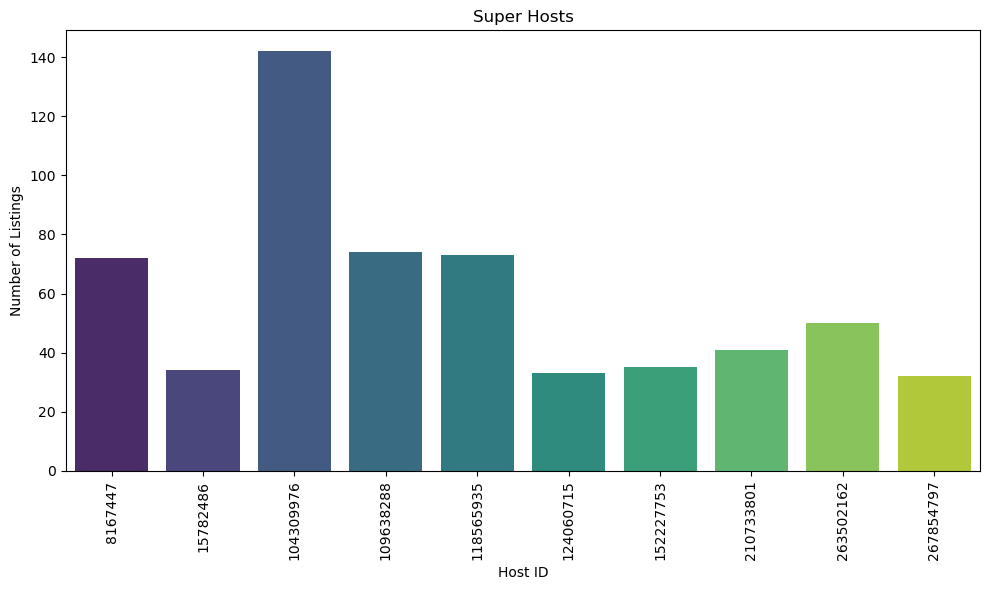

In [223]:
#import seaborn as sns
#import matplotlib.pyplot as plt

# Sort the super_host variable based on values in descending order
super_host_sorted = super_host.sort_values(ascending=True)
print(super_host_sorted.index)
# # Create a bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=super_host_sorted.index, y=super_host_sorted.values, palette="viridis")

# # Customize the plot
plt.title("Super Hosts")
plt.xlabel("Host ID")
plt.ylabel("Number of Listings")
plt.xticks(rotation=90)

# # Show the plot
plt.tight_layout()
plt.show()


Text(0, 0.5, '$ Price')

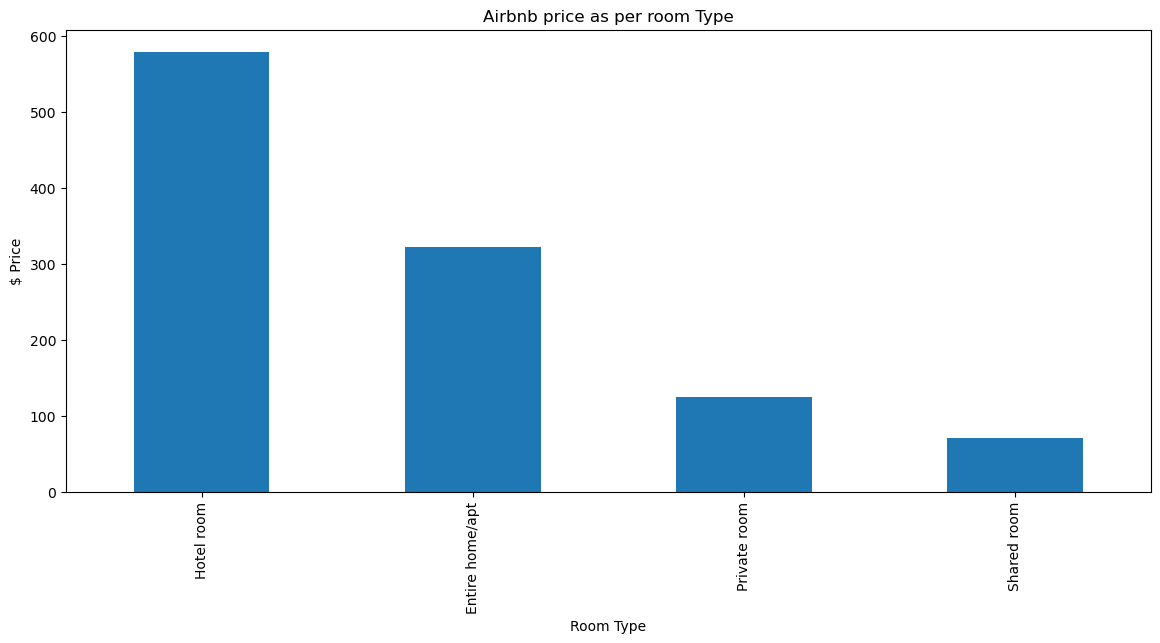

In [224]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))

x = data2.groupby(['room_type'])['price'].mean().sort_values(ascending=False)
#x
x.plot(kind='bar')

plt.title('Airbnb price as per room Type')

plt.xlabel('Room Type')

plt.ylabel('$ Price')

In [225]:
#2) Bell Shaped graph

#import random
#number = 50
#trials=10000
#head_count =[]
#for i in range(trials):
    #heads=0   
    #for amount in range(number):
        #flip = random.randint(0, 1)
        #if (flip == 0):
            #heads=heads+1
    #head_count.append(heads)
#plt.hist(head_count, bins = n_bins)
#plt.style.use('ggplot')
#plt.show()



In [226]:
# InterQuntileRange(IQR) function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
print("IQR of number_of_reviews: ",data2["number_of_reviews"].agg(iqr))
#print("IQR of price: ",data2["price"].agg(iqr))

#Combine
#print(data2[["number_of_reviews","price"]].agg(iqr))

IQR of number_of_reviews:  31.0


In [227]:
#median
print(data2[["number_of_reviews","price"]].agg([iqr, np.median,np.mean]))

        number_of_reviews       price
iqr              31.00000  190.000000
median            6.00000  150.000000
mean             33.81148  279.815161


In [228]:
#data2.describe()
#data2.describe(include = 'all')

In [229]:
#Counting
#Question: Who are the top 10 hosts based on the listing?

#data2.host_name.value_counts().head(10)
data2.name.value_counts().head(10)

#Question: Now that we know the super hosts we can check the airbnb names

#unique top 10 list

#test = data2.drop_duplicates(subset = ['name','host_name'])
#test.name.value_counts().head(10)



Home away from home        4
Wyndham Austin             4
Cozy Private Room          3
Austin House               3
West Campus Apartment      3
East Side Bungalow         3
South Austin Retreat       3
Central Austin Home        3
Central Austin Bungalow    3
East Austin Bungalow       3
Name: name, dtype: int64

### Statistics


###### 3.2) DATA AGGREGATING

Question: Which year the rentals were maximum?

 **Group by**

[2021 2020 2017 2016 2019 2018 2015 2014 2013 2012]
      price
Year       
2021  16845
2015  10000
2017  10000
2018  10000
2020   9998
2013   5021
2016   5000
2019   4000
2014   2150
2012    643


[Text(0, 0, '2021'),
 Text(1, 0, '2020'),
 Text(2, 0, '2017'),
 Text(3, 0, '2016'),
 Text(4, 0, '2019'),
 Text(5, 0, '2018'),
 Text(6, 0, '2015'),
 Text(7, 0, '2014'),
 Text(8, 0, '2013'),
 Text(9, 0, '2012')]

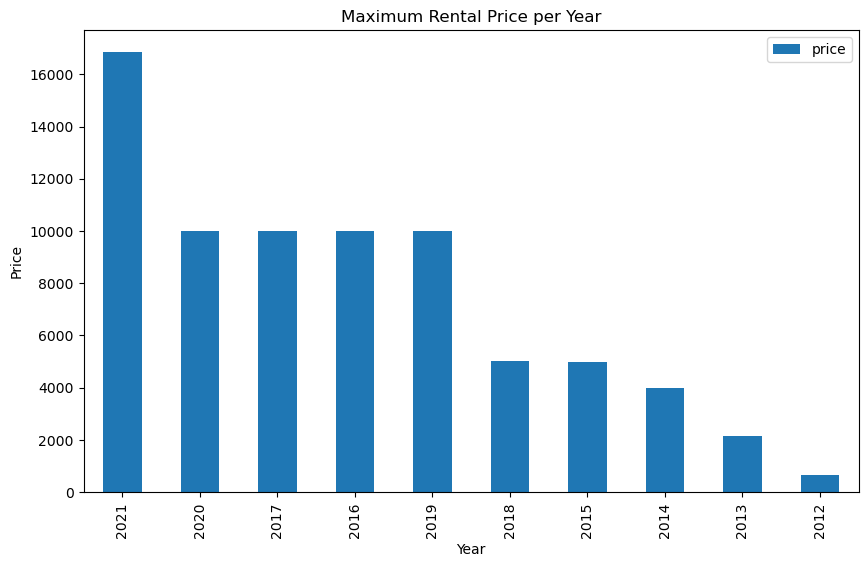

In [230]:
#Lets get the unique years
unique_years = data2['Year'].unique()
print(unique_years)

# Filter the DataFrame for the unique years
filtered_x1 = data2[data2['Year'].isin(unique_years)]

# Group by the 'Year' column and get the maximum price for each year
grouped = filtered_x1[['Year', 'price']].groupby('Year').max().sort_values(by='price', ascending=False)
print(grouped)

# Plot the maximum rental price per year
ax = grouped.plot(kind='bar', title="Maximum Rental Price per Year", figsize=(10, 6))
ax.set_xlabel('Year')
ax.set_ylabel('Price')
ax.set_xticks(range(len(unique_years)))
ax.set_xticklabels(unique_years)



Question: Calculate the average price based on each room_type.

In [231]:
price_room_type = data2.groupby('room_type')['price'].mean()


In [232]:
price_room_type

room_type
Entire home/apt    322.149361
Hotel room         579.727273
Private room       124.386713
Shared room         70.102564
Name: price, dtype: float64

Question: Calculate the proportion of price of each room category.


In [233]:
#use group by the price of each room type
price_room = data2.groupby('room_type')['price'].sum()

#calculating the proportion
prop_price_room = price_room/sum(price_room)
print("\nProportion of price for each room type:")
print(prop_price_room)


Proportion of price for each room type:
room_type
Entire home/apt    0.905619
Hotel room         0.002267
Private room       0.089198
Shared room        0.002916
Name: price, dtype: float64


Question: group by the price of each room type in different years

In [234]:

price_room_yearwise = data2.groupby(['room_type','Year'])['price'].agg([np.min, np.max, np.mean, np.median])


In [235]:
price_room_yearwise

amin     amax         mean  median
room_type       Year                                     
Entire home/apt 2012  175.0    643.0   318.600000   250.0
                2013  225.0   1050.0   542.714286   425.0
                2014  125.0   2150.0   635.812500   462.5
                2015   30.0  10000.0   366.752809   200.0
                2016   18.0   5000.0   322.755102   200.0
                2017    1.0   1776.0   255.552124   170.0
                2018   25.0  10000.0   275.923885   150.0
                2019   20.0   4000.0   284.469880   180.0
                2020   10.0   5947.0   287.045255   145.0
                2021   18.0  16845.0   334.485056   182.0
Hotel room      2012    NaN      NaN          NaN     NaN
                2013    NaN      NaN          NaN     NaN
                2014    NaN      NaN          NaN     NaN
                2015    NaN      NaN          NaN     NaN
                2016    NaN      NaN          NaN     NaN
                2017  210.0    210.0   210.000000   210.0
                2018    NaN      NaN          NaN     NaN
                2019  175.0    175.0   175.000000   175.0
                2020  200.0   2750.0  1056.666667   220.0
                2021    0.0   1750.0   470.333333   236.5
Private room    2012    NaN      NaN          NaN     NaN
                2013   55.0   5021.0  1385.250000   232.5
                2014  100.0    300.0   163.714286   105.0
                2015   27.0    350.0   100.560976    90.0
                2016   19.0   1123.0    96.892857    65.0
                2017    5.0  10000.0   157.219512    59.0
                2018   19.0    500.0    85.046053    61.5
                2019   20.0    699.0    85.138462    63.5
                2020   20.0   9998.0   106.150198    52.0
                2021    1.0  10000.0   137.860933    70.0
Shared room     2012    NaN      NaN          NaN     NaN
                2013    NaN      NaN          NaN     NaN
                2014    NaN      NaN          NaN     NaN
                2015   53.0    120.0    79.500000    72.5
                2016   19.0    700.0   226.400000    40.0
                2017   25.0    111.0    63.428571    52.0
                2018   17.0     85.0    35.076923    26.0
                2019   15.0    105.0    38.076923    25.0
                2020   16.0     57.0    29.785714    25.0
                2021   14.0    700.0    80.983607    30.0

##### **Pivot Table summary**

Question: Calculate the price of different room types based on the last_review date.

In [236]:
#price_room_last_review = data2.pivot_table(values = 'price', index = 'room_type', columns = 'last_review', margins= True)

In [237]:
#price_room_last_review

In [238]:
#price_room__review = data2.pivot_table(values = 'number_of_reviews', index = ['room_type','Year'], columns = ['Month'], margins= True)

In [239]:
#price_room__review

In [240]:
#we can fill the NAN values with '0'
price_room__review = data2.pivot_table(values = 'number_of_reviews', index = ['room_type','Year'], columns = ['Month'], aggfunc=[np.mean], fill_value = 0)
price_room__review

mean                                              \
Month                     April     August   December   February    January   
room_type       Year                                                          
Entire home/apt 2012   0.000000   0.000000   0.000000   0.000000   0.000000   
                2013   0.000000   0.000000   0.000000   0.000000   0.000000   
                2014   0.000000   0.000000   1.000000   0.000000   0.000000   
                2015   5.000000   4.500000   0.000000   0.000000   0.000000   
                2016   6.800000   7.000000   1.500000   6.428571   2.500000   
                2017   6.894737  10.000000   6.083333   1.500000   3.500000   
                2018   8.111111   9.142857   6.545455   8.500000   9.833333   
                2019   9.720930  16.965517  19.782609  22.705882  11.117647   
                2020  42.647059  28.647059  30.488889  32.187500  27.341463   
                2021   3.469150   0.000000   0.000000  38.915254  25.831169   
Hotel room      2017   0.000000   0.000000   0.000000   0.000000   0.000000   
                2019   0.000000   0.000000   0.000000   0.000000   0.000000   
                2020   0.000000   0.000000   0.000000   1.500000   1.000000   
                2021   0.000000   0.000000   0.000000   0.000000   0.000000   
Private room    2013   0.000000   0.000000   0.000000   0.000000   0.000000   
                2014   0.000000   0.000000   0.000000   0.000000   2.500000   
                2015   0.000000   3.000000   3.000000   2.000000   0.000000   
                2016   6.200000   4.250000  27.666667   5.500000   6.250000   
                2017   5.777778   2.333333   8.333333   9.333333   3.333333   
                2018  14.666667   5.000000   5.000000   5.000000  13.000000   
                2019   7.818182  25.812500  33.687500  11.222222   6.000000   
                2020  31.500000  10.100000  10.333333  49.523810  13.312500   
                2021   2.380634   0.000000   0.000000   6.166667  15.421053   
Shared room     2015   0.000000   0.000000   0.000000   0.000000   0.000000   
                2016   0.000000   5.000000   0.000000   0.000000   0.000000   
                2017  35.000000   0.000000  14.000000   0.000000   0.000000   
                2018   0.000000   0.000000   0.000000   0.000000  35.000000   
                2019   0.000000   4.333333   0.000000   0.000000  22.000000   
                2020   6.000000   3.500000  12.000000   3.000000   6.000000   
                2021   1.428571   0.000000   0.000000   9.000000   0.000000   

                                                                              \
Month                      July       June      March         May   November   
room_type       Year                                                           
Entire home/apt 2012   0.000000   0.000000   1.250000    0.000000   1.000000   
                2013   1.000000   2.000000   1.400000    0.000000   0.000000   
                2014   0.000000   0.000000   1.769231    1.000000   2.000000   
                2015   7.000000   2.000000   2.219512   10.500000   7.700000   
                2016   7.333333   7.500000   2.185185    5.818182   4.777778   
                2017   9.157895   9.000000   4.828125    7.653846  10.909091   
                2018  15.684211  13.142857   5.206186   24.675676  15.166667   
                2019  20.692308  20.478261  11.989796    7.789474  16.657143   
                2020  55.403846  51.102564  58.621891   19.388889  24.101695   
                2021  78.912429  67.216923  27.410853   35.184641   0.000000   
Hotel room      2017   0.000000   0.000000   0.000000    0.000000   0.000000   
                2019   0.000000   0.000000   0.000000    0.000000   0.000000   
                2020   0.000000   0.000000   0.000000    0.000000   0.000000   
                2021   0.000000   0.000000   0.000000  147.000000   0.000000   
Private room    2013   0.000000   0.000000   1.666667    0.

######  3.5) DATA SLICING AND MERGING


Question: Lets analyze and visualize most host  and their airbnb's in the listing 

In [241]:
#lets create a filtered data for the required query
popular_host = data2.host_name.value_counts().head(10)
popular_host

#lets create a dataframe
popular_host_df=pd.DataFrame(popular_host)
popular_host_df

#reset_index()
popular_host_df.reset_index(inplace=True)
popular_host_df

#rename index
popular_host_df.rename(columns={'index':'Host_Name', 'host_name':'Listing'}, inplace=True)
popular_host_df


,Host_Name,Listing
0,WanderJaunt,142
1,TurnKey Vacation Rentals,110
2,Martin,108
3,David,95
4,Michael,94
5,Renters Club,73
6,Sarah,73
7,Ryan,64
8,Jason,56
9,James,56


##### **DataSlicing using the follwing method(easier ways):**
             1).loc()
             2).iloc()
             

In [242]:
#Difference between .loc() and .iloc()

#.loc()
#Question: To get all the rows corresponding to different columns

x = data2.loc[:,['number_of_reviews','last_review']].head()

#.iloc()

data2.iloc[0:11,1:5]


,name,host_id,host_name,neighbourhood
10051,Mid-Century on a corner lot with fenced yard,80406,Dani,78704
2365,Family Home Near McKinney Falls State Park,75052930,Michelle,78744
7452,Oak Room with Desk in Spacious Home,55313369,Katrina,78749
2367,Lovely House near Domain,72926795,Carmen,78758
2368,Luxurious stay in new modern home in South Austin,24597163,Sriharesh,78745
7450,Gorgeous 3/2 house available for SXSW!,8117218,Lyssa,78703
7449,Modern Stylish Eastside Home - Available for SXSW,3883199,Cathryn,78721
2371,New Austin Home,75988545,Sean,78754
7448,"Near UT! Condo Hotel for 4, Large Studio w/Kit...",36694646,Judy,78701
7447,Entire apartment - S. Congress Ave downtown Au...,170437228,Tom,78704


In [243]:
#data2.groupby('host_name').room_type

In [244]:
#data2 = data2.groupby(by ='room_type')

# FUNDAMENTAL STATISTICS

#### RANGE

Question: What is the range of the price we are looking at in this dataset?

In [245]:
price_range = max(data2.price) - min(data2.price)
price_range

16845

#### SKEWNESS

In [246]:
data2 = pd.DataFrame(data2)

In [247]:
data2[["price", "minimum_nights", "number_of_reviews", "reviews_per_month",
    "calculated_host_listings_count", "availability_365"]].skew()
    


price                             11.953560
minimum_nights                    21.456711
number_of_reviews                  4.340556
reviews_per_month                 15.420051
calculated_host_listings_count     4.645914
availability_365                   0.772367
dtype: float64

Now that we have seen the skewness result and easliy spot 
        
        'availability_365' - slighty skewed
        'price' and 'minimun_nights' are right skewed
     
     Mostly all of the above are right skewed.     

<Axes: xlabel='price', ylabel='Count'>

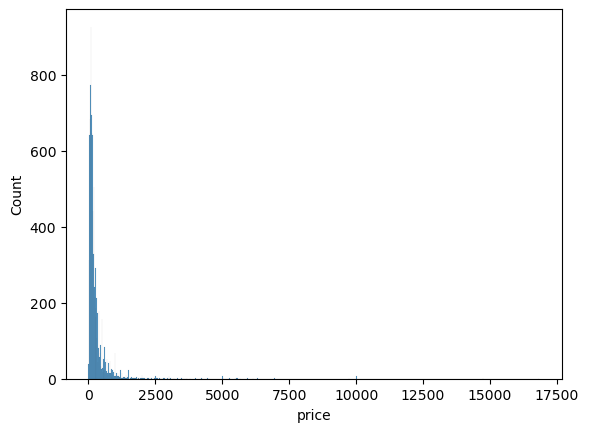

In [248]:
#Visualize the skewed data
import seaborn as sns
sns.histplot(data2.price)

In [249]:
data2.describe()

,id,host_id,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,Year,reviews_per_year
count,1.005200e+04,1.005200e+04,10052.000000,10052.000000,10052.000000,10052.000000,10052.000000,10052.000000,10052.000000,10052.000000,10052.000000,10052.000000,10052.000000
mean,2.783877e+07,9.219867e+07,78723.069240,30.279781,-97.752187,279.815161,7.151015,33.811480,1.949989,8.246717,111.610824,2020.165738,0.016733
std,1.596334e+07,1.068485e+08,20.759861,0.059969,0.059915,553.127645,24.003745,70.627118,6.176871,21.898642,127.150684,1.503416,0.034949
min,2.265000e+03,2.300000e+01,78701.000000,30.078870,-98.056630,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2012.000000,0.000000
25%,1.464801e+07,1.125947e+07,78704.000000,30.243958,-97.769042,89.000000,1.000000,1.000000,0.020000,1.000000,0.000000,2020.000000,0.000495
50%,2.825201e+07,4.472722e+07,78722.000000,30.269060,-97.744410,150.000000,2.000000,6.000000,0.420000,1.000000,59.000000,2021.000000,0.002975
75%,4.273616e+07,1.387701e+08,78744.000000,30.303020,-97.720225,279.000000,3.000000,32.000000,1.930000,3.000000,215.000000,2021.000000,0.015834
max,5.090177e+07,4.110306e+08,78759.000000,30.515090,-97.560620,16845.000000,1100.000000,917.000000,250.000000,158.000000,365.000000,2021.000000,0.453736


###### Question: How to remove this skewness?

Method 1) Log Transform

<Axes: xlabel='price', ylabel='Count'>

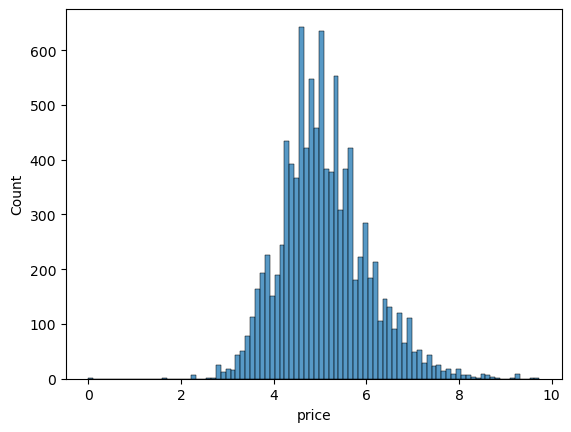

In [250]:
#using numpy as np and log
price_log = np.log(data2.price)
price_log

#visualize 
sns.histplot(price_log)

Method 2) Square Root Transform

3.3888650744785633


<Axes: xlabel='price', ylabel='Density'>

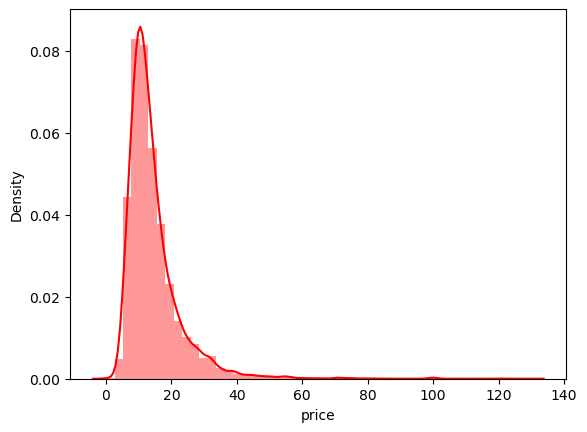

In [251]:
import warnings
warnings.filterwarnings('ignore')
#using numpy as np and sqrt
price_sqrt = np.sqrt(data2.price)

print(price_sqrt.skew())


#visualize
#import seaborn as sns
sns.distplot(price_sqrt, color = 'red')


From the above we can correct the skewness to an extent using the above method.

    But the we can see there are outliers for sure ---> needs immediate attention


###### Question: Compare price of airbnbs at different locations(zip_code) 

For this we will look at the scatter plot 

<Axes: xlabel='longitude', ylabel='latitude'>

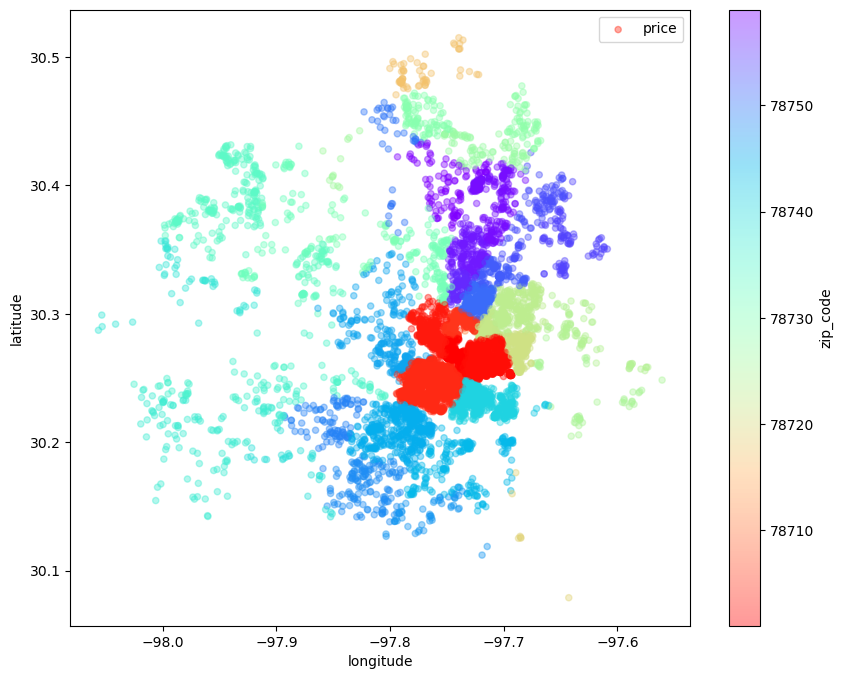

In [252]:
#Scatter plot
import matplotlib.pyplot as plt

price_location.plot(kind='scatter', x='longitude', y='latitude', c ='zip_code', label = 'price',
                  cmap=plt.get_cmap('rainbow_r'), colorbar=True, alpha=0.4, figsize=(10,8))



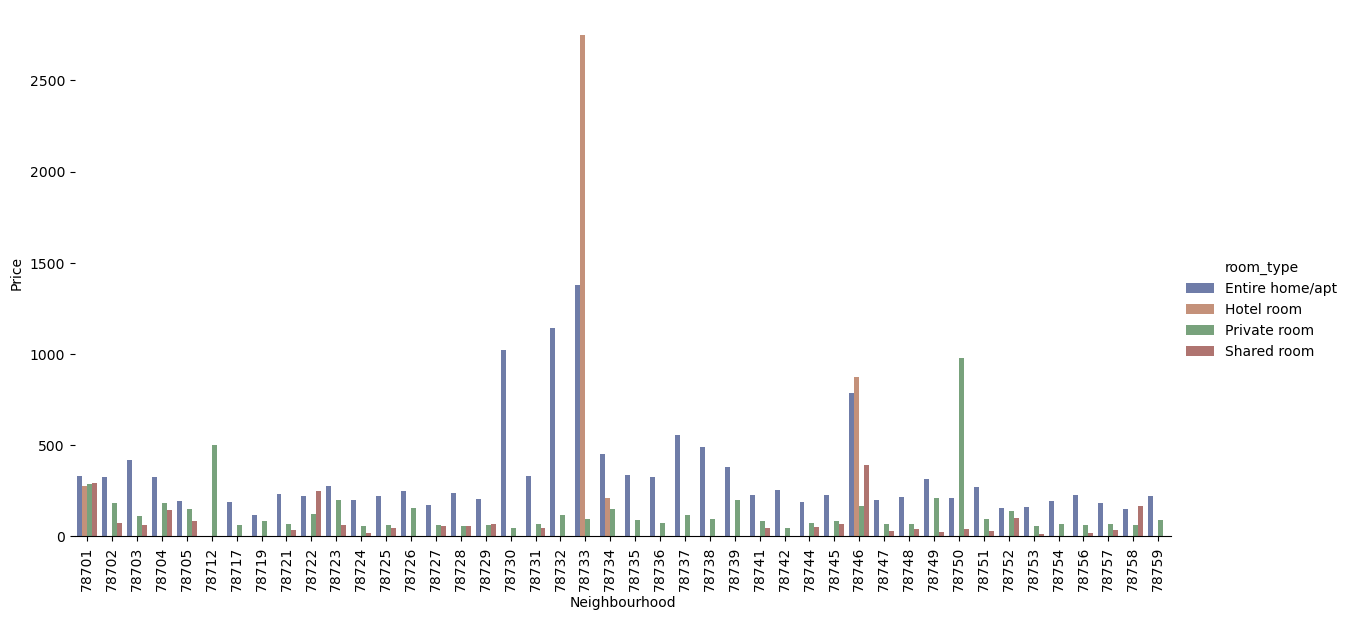

In [253]:
stats = data2.groupby(['neighbourhood','room_type'])['price'].agg(['mean','std','count'])
stats.reset_index(inplace=True)
stats.head(5)


# Draw a nested barplot
g = sns.catplot(data=stats, kind="bar",
                x="neighbourhood", y="mean", hue="room_type", 
                errorbar='sd', palette="dark", alpha=.6, height=6,aspect=2)
g = g.despine(left=True)
g = g.set_axis_labels("Neighbourhood", "Price")
g = g.set_xticklabels(rotation=90)

<Figure size 1000x600 with 0 Axes>

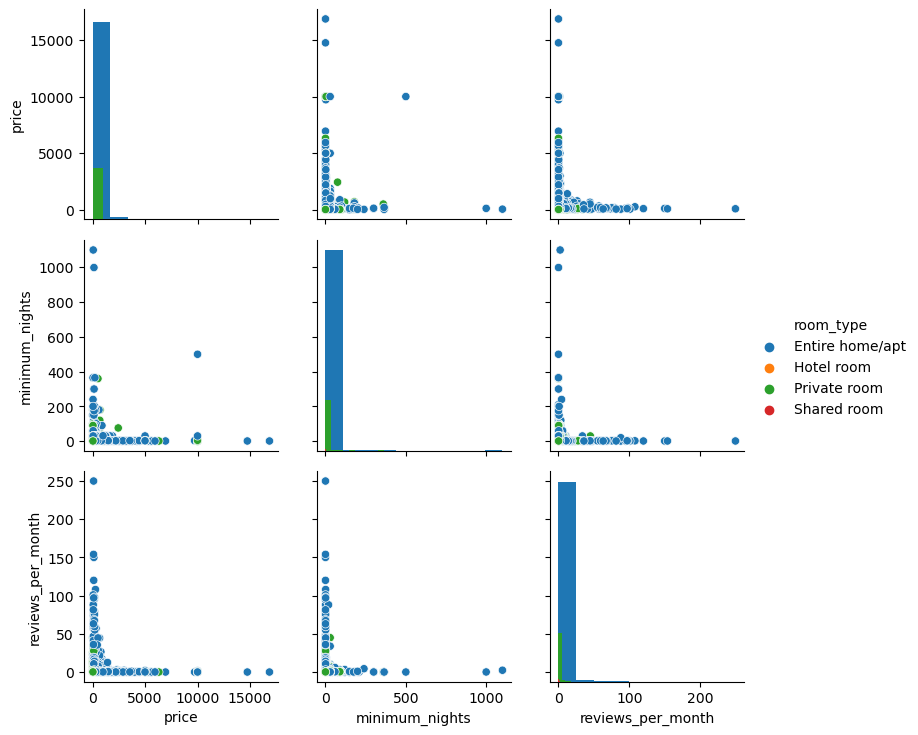

In [254]:
plt.figure(figsize=(10,6))

variables = ["price", "minimum_nights", "reviews_per_month"]
g = sns.PairGrid(data2, hue="room_type", vars=variables)


g.map_diag(plt.hist)
g.map_offdiag(sns.scatterplot)
g.add_legend()


In [255]:
#orignal_data = price_min_nights['calculated_host_listings_count']



#### Data Normalization: Feature Scaling Method

**Subsetting data columns from dataframe

In [256]:
price_min_nights = data2[['price', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count']]

In [257]:
price_min_nights.head(25)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count
10051,199,7,0,12
2365,60,20,0,1
7452,48,1,0,2
2367,85,30,12,1
2368,70,1,0,1
7450,700,3,0,1
7449,562,2,0,1
2371,100,1,0,1
7448,200,3,0,3
7447,229,1,0,1


In [258]:
price_min_nights.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count
count,10052.000000,10052.000000,10052.000000,10052.000000
mean,279.815161,7.151015,33.811480,8.246717
std,553.127645,24.003745,70.627118,21.898642
min,0.000000,1.000000,0.000000,1.000000
25%,89.000000,1.000000,1.000000,1.000000
50%,150.000000,2.000000,6.000000,1.000000
75%,279.000000,3.000000,32.000000,3.000000
max,16845.000000,1100.000000,917.000000,158.000000


We can see the feature calculated_host_listings_count is in the range of 1 to 142. 
While another feature number_of_reviews is also in the range of 1 to 917.

<Axes: >

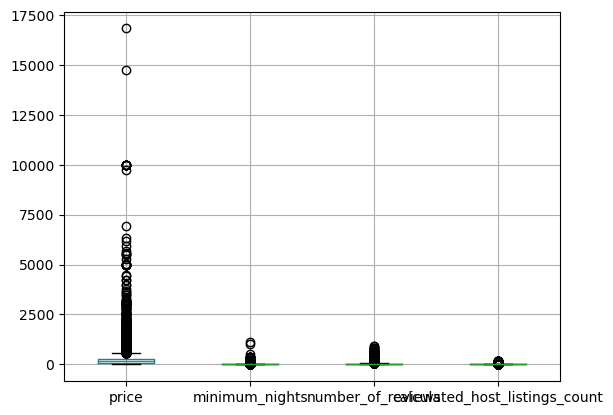

In [259]:
price_min_nights.boxplot()



#To set the x label
#price_min_nights.set_xticklabels(price_min_nights.get_xticklabels(), rotation=90)



#ax = sns.boxplot(y="total_range",data=price_min_nights, palette="Set3")
#boxplot clearly shows that there is outlier incase of "price" feature

Lets use the different data normalization methods
 
 1) Simple feature scaling
 2) Min-Max feature scaling
 3) Z-score

Lets see an example 

In [260]:
#approach 1
#We have used a method of slicing .loc()
price_min_nights.loc[:,'calculated_host_listings_count']/price_min_nights.loc[:,'calculated_host_listings_count'].max()

10051    0.075949
2365     0.006329
7452     0.012658
2367     0.006329
2368     0.006329
           ...   
257      0.006329
4482     0.012658
2536     0.012658
4734     0.006329
6414     0.006329
Name: calculated_host_listings_count, Length: 10052, dtype: float64

In [261]:
#Approach 2
(price_min_nights.loc[:,'calculated_host_listings_count']- price_min_nights.loc[:,'calculated_host_listings_count'].min())/(price_min_nights.loc[:,'calculated_host_listings_count'].max() - price_min_nights.loc[:,'calculated_host_listings_count'].min())

10051    0.070064
2365     0.000000
7452     0.006369
2367     0.000000
2368     0.000000
           ...   
257      0.000000
4482     0.006369
2536     0.006369
4734     0.000000
6414     0.000000
Name: calculated_host_listings_count, Length: 10052, dtype: float64

In [262]:
#Approach 3
price_min_nights['calculated_host_listings_count'] = (price_min_nights.loc[:,'calculated_host_listings_count'] - price_min_nights.loc[:,'calculated_host_listings_count'].mean())/price_min_nights.loc[:,'calculated_host_listings_count'].std()

<Figure size 1000x600 with 0 Axes>

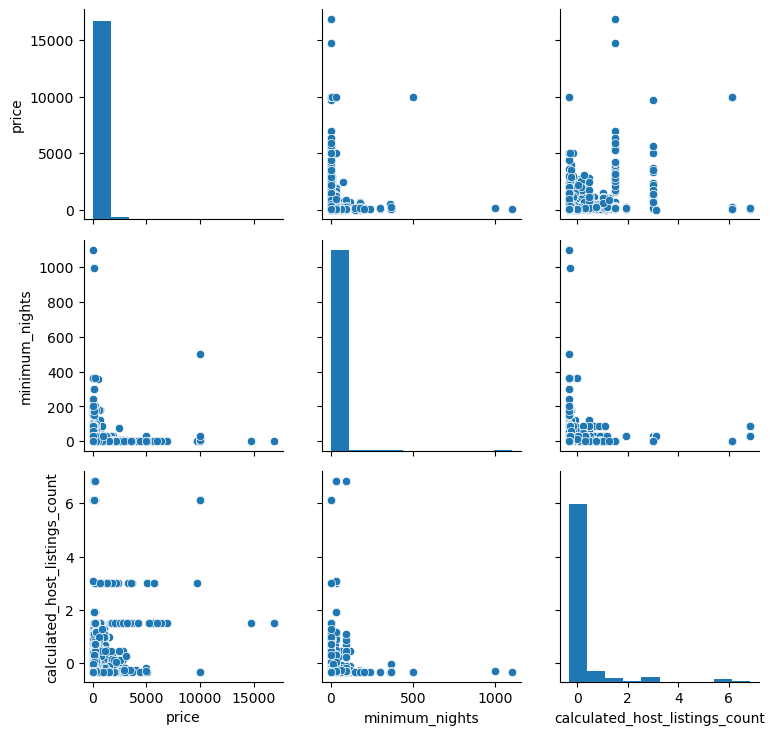

In [263]:
plt.figure(figsize=(10,6))

variables = ["price", "minimum_nights", 'calculated_host_listings_count']
g = sns.PairGrid(price_min_nights, vars=variables)


g.map_diag(plt.hist)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Let us visualize to observe the difference

In [264]:
#library required
from scipy import stats

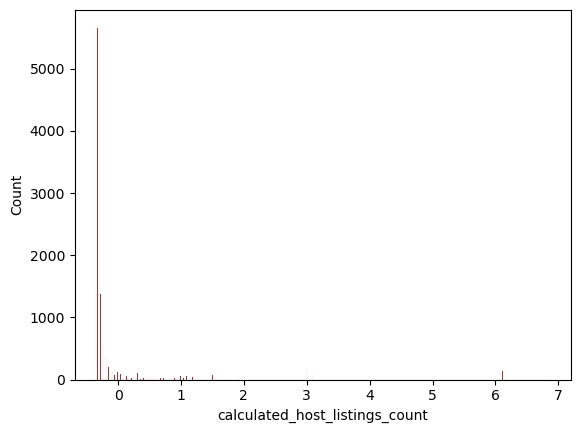

In [265]:
# plot both together to compare

sns.histplot(price_min_nights['calculated_host_listings_count'], color="maroon" )

x =(price_min_nights.loc[:,'calculated_host_listings_count'] - price_min_nights.loc[:,'calculated_host_listings_count'].mean())/price_min_nights.loc[:,'calculated_host_listings_count'].std()
#sns.distplot(x[0], color="maroon", ax=ax[1])
#ax[1].set_title("Normalized data")


In [266]:
#Histogram
#sns.hist(by = 'room_type', column = 'price')

#### OUTLIER DETECTION

###### METHOD 1 - Mean, Mode and Standard deviation Measure
(IF THE DATASET IS ONE-DIMENSIONAL)

In [267]:
example_data = np.random.randn(50000)  * 20 + 20
example_data 

array([12.85816292, 22.6578574 , -8.91800111, ..., 43.49131372,
        8.18122837,  0.36918115])

In [268]:
#Example 1
#random numbers to get some real values
example_data = np.random.randn(50000)  * 20 + 20

# Function to detect the outlier 
def find_outlier(example_data):
    # Set upper and lower limit to 3 standard deviation
    list_error = [] #list to collect outliers
    
    random_data_std = np.std(example_data) #standard deviation
    random_data_mean = np.mean(example_data) #mean 
    cut_off = random_data_std * 3
    
    lower_limit  = random_data_mean - cut_off 
    upper_limit = random_data_mean + cut_off
    print(lower_limit)
    print(upper_limit)
    
    # Generate outliers
    for outlier in example_data:
        if outlier > upper_limit or outlier < lower_limit:
            list_error.append(outlier)
    return list_error



find_outlier(example_data)

-39.78193314449547
79.61453580106935


[88.16213076812664,
 82.32601804835048,
 84.8878059475393,
 85.71523495210108,
 84.7992298394916,
 81.87027540897301,
 -41.049552071610826,
 -44.90253663013499,
 88.47681343718291,
 84.97986893145838,
 87.95995139565132,
 -51.85849942894136,
 -47.38971253183898,
 88.58536892848693,
 82.64874673230557,
 -50.097836523037685,
 -41.6633193545164,
 -46.500487213041154,
 80.91412456196629,
 -42.32241307645751,
 84.86657916842671,
 79.83184017176873,
 -43.356367228991246,
 -47.782487183758505,
 81.85679166659273,
 85.71637378142954,
 -52.54570797793622,
 80.61405697792623,
 82.62044012842185,
 92.99848755283803,
 88.9893007047636,
 87.88622943710223,
 -42.69497763626341,
 82.32429086588823,
 -42.35607473648787,
 82.27691714144623,
 -53.0638567296392,
 80.32575777260571,
 81.84149803360563,
 86.28848673399519,
 88.03020176929482,
 79.71867924990664,
 -42.0394770301171,
 -42.86719444611822,
 90.52133998114898,
 79.67437588858581,
 85.242198626449,
 84.6761734703933,
 -42.145736076288614,
 -41.8

###### METHOD 2 - INTERQURATILE RANGE(IQR) THROUGH BOXPLOT 

In [269]:
#from above we saw the 'price feature' has some outliers
def out_iqr(data2, k=1.5):
    
    # calculate interquartile range
    q25, q75 = np.percentile(data2['price'], 25),np.percentile(data2['price'], 75)
    iqr = q75 - q25
    print(iqr)

out_iqr(data2)

190.0


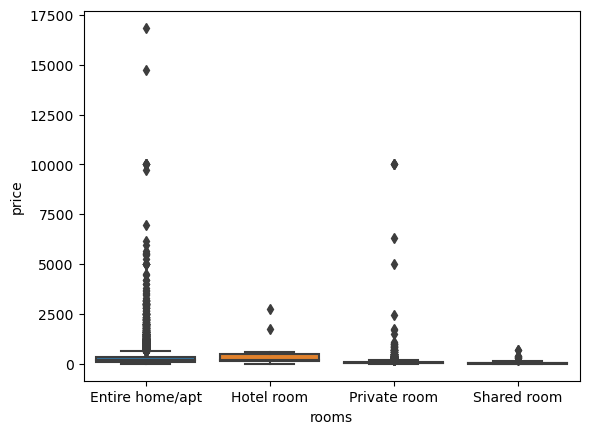

In [270]:
#Box and whisker

#boxplot1
sns.boxplot(x='room_type', y='price', data=data2)

_= plt.xlabel('rooms')

#_ = plt.ylabel('price')






neighbourhood                        Axes(0.125,0.53;0.227941x0.35)
minimum_nights                    Axes(0.398529,0.53;0.227941x0.35)
number_of_reviews                 Axes(0.672059,0.53;0.227941x0.35)
reviews_per_month                    Axes(0.125,0.11;0.227941x0.35)
calculated_host_listings_count    Axes(0.398529,0.11;0.227941x0.35)
price                             Axes(0.672059,0.11;0.227941x0.35)
dtype: object

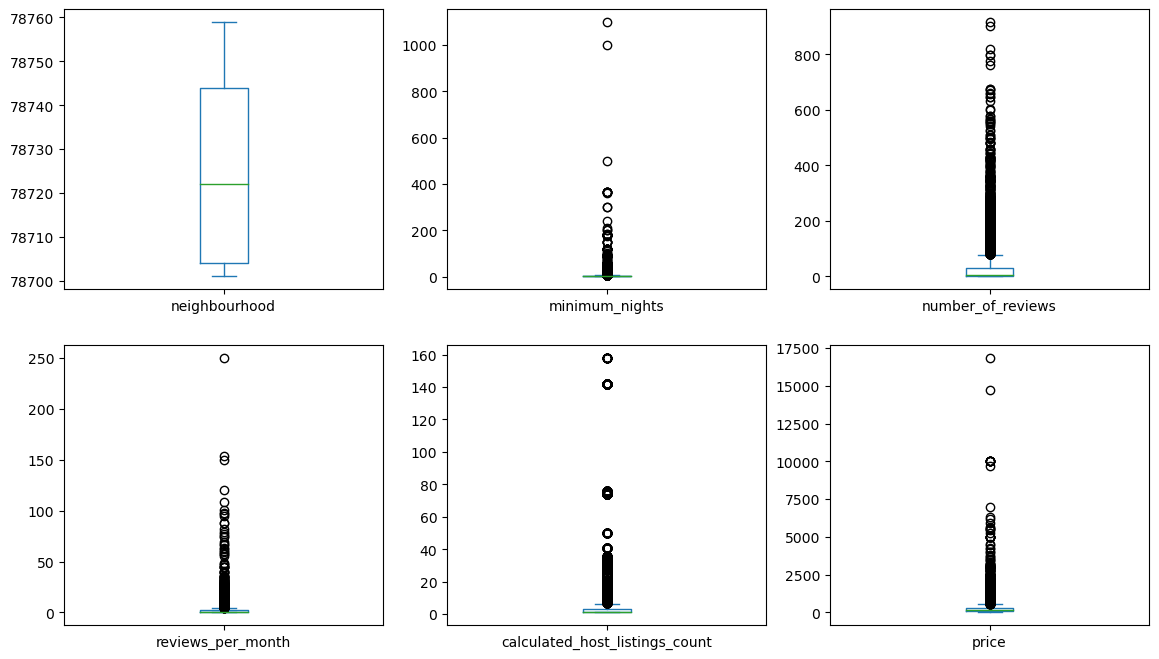

In [271]:
#boxplot2

#list of the columns to see the outlier
col = ['neighbourhood','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','price']

#plot the boxplot

data2[col].plot(kind = 'box', subplots = True, layout = (2,3), figsize = (14,8))

###### How to remove the outlier using Z-score?


Here I am considering one of the columns

In [272]:
outlier1 = pd.DataFrame(data2['price'])

# 1) calculate the zscore 
outlier1['zscore'] = ( outlier1.price - outlier1.price.mean() ) / outlier1.price.std()
outlier1.head(10)

,price,zscore
10051,199,-0.146106
2365,60,-0.397404
7452,48,-0.419099
2367,85,-0.352207
2368,70,-0.379325
7450,700,0.759653
7449,562,0.510162
2371,100,-0.325088
7448,200,-0.144298
7447,229,-0.091869


In [273]:
#before the next steps, keep in mind the following things:

#calculate the mean
print(data2.price.mean())

#calculate the std
print(data2.price.std())

'''
From the above, if we consider the data point as $379 
Its Z-score indicates the data-point is 0.2 times standard deviation 
away from the mean.

'''



279.8151611619578
553.1276453743338


'\nFrom the above, if we consider the data point as $379 \nIts Z-score indicates the data-point is 0.2 times standard deviation \naway from the mean.\n\n'

As next steps we can remove the outlier point from the data which are by 

calculating if the data point is:

    lower than the lower limit 
    higher than the higher limit

**Considering lower limit and higher limit are 3 standard deviation away


In [274]:
#Z-score lower than -3
#print(outlier1[outlier1.zscore < -3])

#Z-score upper than 3
#print(outlier1[outlier1.zscore > 3])

#Both conditions 
#outlier1[(outlier1.zscore < -3) | (outlier1.zscore > 3)] 


From above we clearly found the oulier list

*****Lets scrape it out from the data

In [275]:
no_outlier1 = outlier1[(outlier1.zscore > -20) & (outlier1.zscore < 20)]
no_outlier1.head(10)

,price,zscore
10051,199,-0.146106
2365,60,-0.397404
7452,48,-0.419099
2367,85,-0.352207
2368,70,-0.379325
7450,700,0.759653
7449,562,0.510162
2371,100,-0.325088
7448,200,-0.144298
7447,229,-0.091869


In [276]:
#Lets check if the outliers are removed 

outlier1.shape

(10052, 2)

In [277]:
no_outlier1.shape

(10050, 2)

<Axes: >

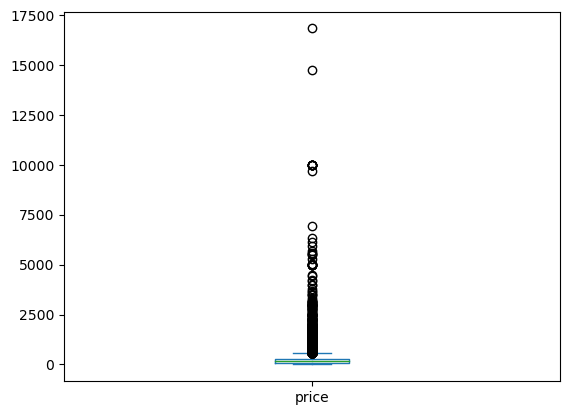

In [278]:
#Boxplot outlier1

outlier1['price'].plot(kind = 'box')

<Axes: >

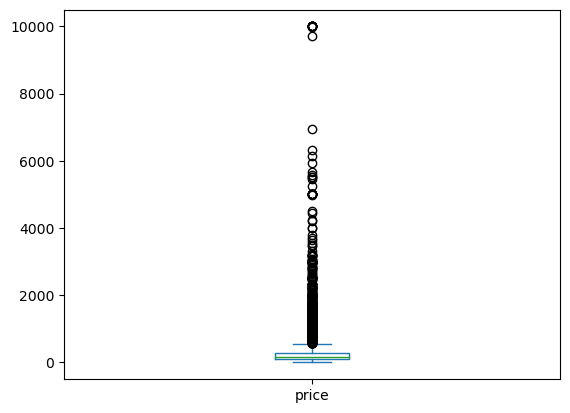

In [279]:
no_outlier1['price'].plot(kind = 'box')

### Method2 of Removing Outliers using IQR

In [280]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'price' column
Q1 = data2['price'].quantile(0.25)
Q3 = data2['price'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for the acceptable range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset to exclude outliers
filtered_data = data2[(data2['price'] >= lower_bound) & (data2['price'] <= upper_bound)]

# Display the first few rows of the filtered dataset
filtered_data.shape

(9049, 18)

<Axes: >

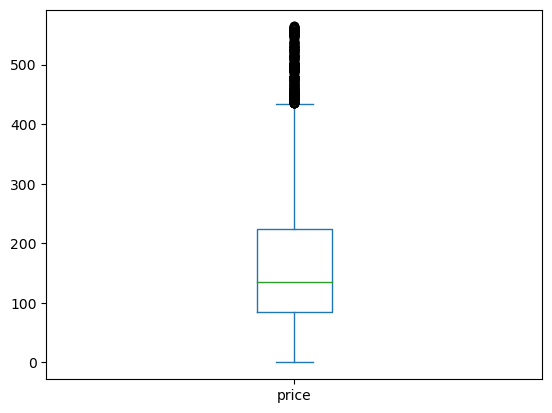

In [281]:
filtered_data['price'].plot(kind = 'box')

<Axes: >

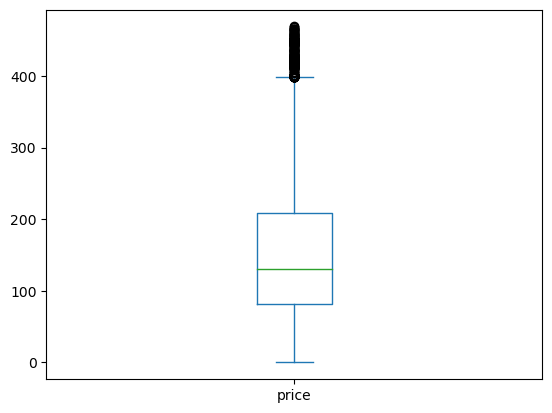

In [282]:
#Excersie: please try to fine tune the value of constant to further remove outliers
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR

#for example
# Define more restrictive lower and upper bounds for the acceptable range (using 1.0 times the IQR)
lower_bound = Q1 - 1.0 * IQR
upper_bound = Q3 + 1.0 * IQR

# Filter the dataset to exclude outliers
filtered_data1 = data2[(data2['price'] >= lower_bound) & (data2['price'] <= upper_bound)]

#visualize
filtered_data1['price'].plot(kind = 'box')
